<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/QUANT019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

features_label_df = pd.read_csv('/content/drive/My Drive/stock_1d_features_label.csv', index_col='Date', parse_dates=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
features_label_df.head(2)

,CLOSE0,CLOSE1,CLOSE2,CLOSE3,CLOSE4,CLOSE5,CLOSE6,CLOSE7,CLOSE8,CLOSE9,...,CNTD60,VMA60,VSTD60,WVMA60,Close,High,Low,Open,Volume,label
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-30,1.0,0.972254,1.014246,0.963542,0.968879,0.880538,0.899651,0.960637,0.968055,0.992347,...,-0.1,1.180844,0.560479,1.428129,61.837036,62.009340,60.524142,60.849335,167976400,ING
2020-03-31,1.0,1.002045,0.974242,1.016320,0.965512,0.970860,0.882339,0.901491,0.962602,0.970034,...,-0.1,1.011150,0.476642,1.432696,61.710846,63.700813,61.155113,62.028759,197002000,TOP


In [3]:
nan_label_df = features_label_df[features_label_df['label'].isna()]
print(nan_label_df.head(10))

            CLOSE0    CLOSE1    CLOSE2    CLOSE3    CLOSE4    CLOSE5  \
Date                                                                   
2020-04-07     1.0  1.011718  0.930540  0.944108  0.928613  0.980187   
2020-04-08     1.0  0.975044  0.986470  0.907318  0.920547  0.905439   
2020-04-14     1.0  0.951925  0.933601  0.926912  0.903780  0.914370   
2020-04-15     1.0  1.009211  0.960693  0.942200  0.935450  0.912105   
2020-04-27     1.0  0.999294  0.971254  0.975033  0.947735  0.977964   
2020-04-30     1.0  0.979340  0.948196  0.963819  0.963138  0.936113   
2020-05-20     1.0  0.980923  0.986624  0.963913  0.969646  0.963725   
2020-05-28     1.0  0.999560  0.995224  1.002011  0.995601  1.003080   
2020-05-29     1.0  1.000975  1.000535  0.996194  1.002988  0.996572   
2020-06-18     1.0  0.999602  1.000995  0.975151  0.963239  0.954994   

              CLOSE6    CLOSE7    CLOSE8    CLOSE9  ...    CNTD60     VMA60  \
Date                                                ... 

In [4]:
# 1. 修改特征列
data = features_label_df.copy()

# 将所有NaN值替换为'ING'
data['label'] = data['label'].fillna('ING')

# 获取特征列并删除不需要的列
feature_columns = data.columns.tolist()
feature_columns.remove('label')
columns_to_remove = ['Close', 'High', 'Low', 'Open']
for col in columns_to_remove:
    if col in feature_columns:
        feature_columns.remove(col)

print("特征列数量:", len(feature_columns))
print("特征列前几个示例:", feature_columns[:5])
print("\n标签分布:")
print(data['label'].value_counts())

特征列数量: 515
特征列前几个示例: ['CLOSE0', 'CLOSE1', 'CLOSE2', 'CLOSE3', 'CLOSE4']

标签分布:
label
ING       578
TOP       162
BOTTOM    161
Name: count, dtype: int64


In [5]:
# 首先检查实际的标签值
print("实际的标签值：", data['label'].unique())

实际的标签值： ['ING' 'TOP' 'BOTTOM']



处理前的标签分布:
label
ING       578
TOP       162
BOTTOM    161
Name: count, dtype: int64

处理后的标签分布:
label
ING       578
TOP       162
BOTTOM    161
Name: count, dtype: int64

数据集大小: 901
特征数量: 515

标签编码映射:
BOTTOM: 0
ING: 1
TOP: 2

训练数据起止日期: 2020-03-30 00:00:00 到 2023-08-30 00:00:00
OOT数据起止日期: 2023-08-31 00:00:00 到 2023-10-25 00:00:00

训练样本形状: X_train: (854, 3090), y_train: (854,)
OOT样本形状: X_oot: (31, 3090), y_oot: (31,)

训练集标签分布:
ING       546
TOP       154
BOTTOM    154
Name: count, dtype: int64

OOT集标签分布:
ING       21
BOTTOM     5
TOP        5
Name: count, dtype: int64

训练集性能:
              precision    recall  f1-score   support

      BOTTOM       1.00      1.00      1.00       154
         ING       1.00      1.00      1.00       546
         TOP       1.00      1.00      1.00       154

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854


OOT样本性能:
              precision    r

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


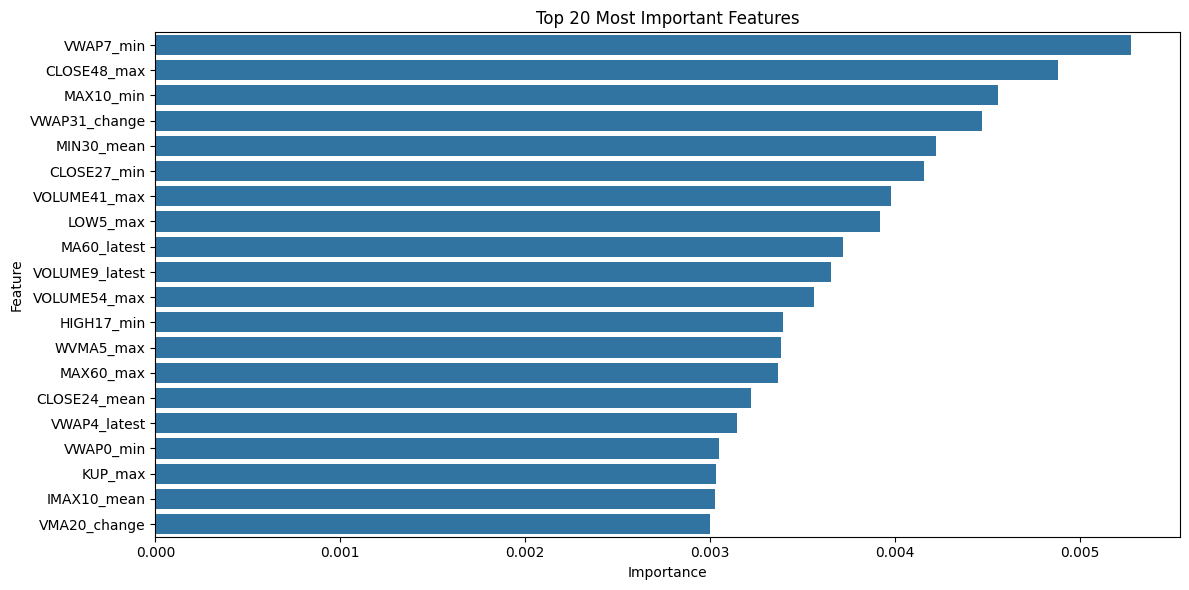


训练集预测示例:
        date predicted
0 2020-04-09       ING
1 2020-04-13       ING
2 2020-04-14       ING
3 2020-04-15       ING
4 2020-04-16       TOP

OOT集预测示例:
         date predicted
0  2023-09-13       ING
1  2023-09-14       ING
2  2023-09-15       ING
3  2023-09-18       ING
4  2023-09-19       ING
5  2023-09-20       ING
6  2023-09-21       ING
7  2023-09-22       ING
8  2023-09-25       ING
9  2023-09-26       ING
10 2023-09-27       ING
11 2023-09-28       ING
12 2023-09-29       ING
13 2023-10-02       ING
14 2023-10-03       ING
15 2023-10-04       ING
16 2023-10-05       ING
17 2023-10-06       ING
18 2023-10-09       ING
19 2023-10-10       ING
20 2023-10-11       ING
21 2023-10-12       ING
22 2023-10-13       ING
23 2023-10-16       ING
24 2023-10-17       ING
25 2023-10-18       ING
26 2023-10-19       ING
27 2023-10-20       ING
28 2023-10-23       ING
29 2023-10-24       ING
30 2023-10-25       ING


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

class SlidingWindowModel:
    def __init__(self,
                 data: pd.DataFrame,
                 feature_columns: list,
                 label_column: str = 'label',
                 observation_window: int = 7,
                 performance_window: int = 2,
                 oot_samples: int = 30):
        """
        初始化滑动窗口模型
        """
        self.data = data.copy()
        self.feature_columns = feature_columns
        self.label_column = label_column
        self.observation_window = observation_window
        self.performance_window = performance_window
        self.oot_samples = oot_samples

        # 处理NaN值
        print("\n处理前的标签分布:")
        print(self.data[label_column].value_counts(dropna=False))

        # 移除标签为NaN的样本
        self.data = self.data.dropna(subset=[label_column])
        print("\n处理后的标签分布:")
        print(self.data[label_column].value_counts())

        # 将标签转换为数值
        self.le = LabelEncoder()
        self.data['label_encoded'] = self.le.fit_transform(self.data[label_column])

        # 保存类别标签
        self.classes_ = self.le.classes_

        # 初始化模型
        self.model = None

        # 打印初始化信息
        print(f"\n数据集大小: {len(self.data)}")
        print(f"特征数量: {len(self.feature_columns)}")
        print("\n标签编码映射:")
        for i, label in enumerate(self.le.classes_):
            print(f"{label}: {i}")

    def generate_single_sample(self, window_data: pd.DataFrame) -> np.ndarray:
        """
        从单个观察窗口生成特征
        """
        features = []
        for col in self.feature_columns:
            # 获取当前特征的最新值并处理可能的NaN值
            feature_series = window_data[col]
            feature_value = feature_series.iloc[-1]

            # 如果最新值是NaN，使用窗口内的最后一个非NaN值
            if pd.isna(feature_value):
                feature_value = feature_series.dropna().iloc[-1] if not feature_series.dropna().empty else 0

            features.append(feature_value)

            # 添加统计特征（处理NaN值）
            features.extend([
                feature_series.mean(),  # pandas的mean()会自动忽略NaN
                feature_series.std() if len(feature_series.dropna()) > 1 else 0,
                feature_series.max() if not feature_series.dropna().empty else 0,
                feature_series.min() if not feature_series.dropna().empty else 0,
                (feature_series.iloc[-1] - feature_series.iloc[0]) if not feature_series.isna().any() else 0
            ])

        return np.array(features)

    def generate_samples(self) -> tuple:
        """
        生成训练样本和OOT样本
        """
        if not isinstance(self.data.index, pd.DatetimeIndex):
            self.data.index = pd.to_datetime(self.data.index)

        total_samples_needed = self.observation_window + self.performance_window

        # 计算OOT数据的起始位置
        oot_start_idx = len(self.data) - self.oot_samples - total_samples_needed

        # 划分训练集和OOT集
        train_data = self.data.iloc[:oot_start_idx].copy()
        oot_data = self.data.iloc[oot_start_idx:].copy()

        print(f"\n训练数据起止日期: {train_data.index[0]} 到 {train_data.index[-1]}")
        print(f"OOT数据起止日期: {oot_data.index[0]} 到 {oot_data.index[-1]}")

        X_train_list, y_train_list, dates_train = [], [], []
        X_oot_list, y_oot_list, dates_oot = [], [], []

        # 生成训练样本
        for i in range(len(train_data) - total_samples_needed + 1):
            obs_start = i
            obs_end = i + self.observation_window
            perf_end = obs_end + self.performance_window

            # 确保性能窗口结束时有有效的标签
            if pd.isna(train_data.iloc[perf_end-1]['label_encoded']):
                continue

            window_data = train_data.iloc[obs_start:obs_end][self.feature_columns]
            features = self.generate_single_sample(window_data)
            label = train_data.iloc[perf_end-1]['label_encoded']

            X_train_list.append(features)
            y_train_list.append(label)
            dates_train.append(train_data.index[perf_end-1])

        # 生成OOT样本
        for i in range(len(oot_data) - total_samples_needed + 1):
            obs_start = i
            obs_end = i + self.observation_window
            perf_end = obs_end + self.performance_window

            # 确保性能窗口结束时有有效的标签
            if pd.isna(oot_data.iloc[perf_end-1]['label_encoded']):
                continue

            window_data = oot_data.iloc[obs_start:obs_end][self.feature_columns]
            features = self.generate_single_sample(window_data)
            label = oot_data.iloc[perf_end-1]['label_encoded']

            X_oot_list.append(features)
            y_oot_list.append(label)
            dates_oot.append(oot_data.index[perf_end-1])

        X_train = np.array(X_train_list)
        y_train = np.array(y_train_list)
        X_oot = np.array(X_oot_list)
        y_oot = np.array(y_oot_list)

        print(f"\n训练样本形状: X_train: {X_train.shape}, y_train: {y_train.shape}")
        print(f"OOT样本形状: X_oot: {X_oot.shape}, y_oot: {y_oot.shape}")

        print("\n训练集标签分布:")
        train_dist = pd.Series(self.le.inverse_transform(y_train)).value_counts()
        print(train_dist)
        print("\nOOT集标签分布:")
        oot_dist = pd.Series(self.le.inverse_transform(y_oot)).value_counts()
        print(oot_dist)

        return X_train, y_train, X_oot, y_oot, dates_train, dates_oot

    def plot_feature_importance(self, feature_importance: pd.DataFrame, top_n: int = 20):
        """
        绘制特征重要性图
        """
        plt.figure(figsize=(12, 6))
        sns.barplot(x='importance', y='feature',
                   data=feature_importance.head(top_n))
        plt.title(f'Top {top_n} Most Important Features')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()

    def train_model(self, model_type: str = 'xgb'):
        """
        训练模型并评估性能
        """
        X_train, y_train, X_oot, y_oot, dates_train, dates_oot = self.generate_samples()

        if len(X_train) == 0 or len(X_oot) == 0:
            raise ValueError("生成的样本为空，请检查窗口大小设置")

        # 计算类别权重
        classes = np.unique(y_train)
        class_weights = dict(zip(classes,
                               len(y_train) / (len(classes) * np.bincount(y_train))))

        if model_type == 'rf':
            self.model = RandomForestClassifier(
                n_estimators=100,
                max_depth=10,
                random_state=42,
                class_weight=class_weights
            )
        elif model_type == 'xgb':
            self.model = xgb.XGBClassifier(
                n_estimators=100,
                max_depth=10,
                learning_rate=0.1,
                random_state=42
            )

        # 训练模型
        self.model.fit(X_train, y_train)

        # 评估训练集性能
        print("\n训练集性能:")
        y_pred_train = self.model.predict(X_train)
        print(classification_report(y_train, y_pred_train,
                                 labels=range(len(self.classes_)),
                                 target_names=self.classes_))

        # 评估OOT样本性能
        print("\nOOT样本性能:")
        y_pred_oot = self.model.predict(X_oot)
        print(classification_report(y_oot, y_pred_oot,
                                 labels=range(len(self.classes_)),
                                 target_names=self.classes_))

        print("\nOOT样本混淆矩阵:")
        print(confusion_matrix(y_oot, y_pred_oot))

        # 特征重要性分析
        if model_type == 'xgb':
            feature_names = []
            for f in self.feature_columns:
                feature_names.extend([
                    f"{f}_latest",
                    f"{f}_mean",
                    f"{f}_std",
                    f"{f}_max",
                    f"{f}_min",
                    f"{f}_change"
                ])

            importance = self.model.feature_importances_
            feature_importance = pd.DataFrame({
                'feature': feature_names[:len(importance)],
                'importance': importance
            })
            feature_importance = feature_importance.sort_values('importance', ascending=False)

            print("\n前20个最重要的特征:")
            print(feature_importance.head(20))

            # 绘制特征重要性图
            self.plot_feature_importance(feature_importance)

        return {
            'dates_train': dates_train,
            'dates_oot': dates_oot,
            'y_pred_train': y_pred_train,
            'y_pred_oot': y_pred_oot
        }

# 使用示例
if __name__ == "__main__":
    try:
        # 假设数据已经加载
        # data = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)

        # 创建模型实例
        model = SlidingWindowModel(
            data=data,
            feature_columns=feature_columns,
            observation_window=7,
            performance_window=2,
            oot_samples=30
        )

        # 训练模型并获取结果
        results = model.train_model(model_type='xgb')

        # 可以进一步分析预测结果
        train_predictions = pd.DataFrame({
            'date': results['dates_train'],
            'predicted': model.le.inverse_transform(results['y_pred_train'])
        })

        oot_predictions = pd.DataFrame({
            'date': results['dates_oot'],
            'predicted': model.le.inverse_transform(results['y_pred_oot'])
        })

        print("\n训练集预测示例:")
        print(train_predictions.head())
        print("\nOOT集预测示例:")
        print(oot_predictions)

    except Exception as e:
        print(f"错误: {str(e)}")
        import traceback
        traceback.print_exc()


处理前的标签分布:
label
ING       578
TOP       162
BOTTOM    161
Name: count, dtype: int64

处理后的标签分布:
label
ING       578
TOP       162
BOTTOM    161
Name: count, dtype: int64

数据集大小: 901
特征数量: 515

标签编码映射:
BOTTOM: 0
ING: 1
TOP: 2

训练数据起止日期: 2020-03-30 00:00:00 到 2023-08-30 00:00:00
OOT数据起止日期: 2023-08-31 00:00:00 到 2023-10-25 00:00:00

训练样本形状: X_train: (854, 3090), y_train: (854,)
OOT样本形状: X_oot: (31, 3090), y_oot: (31,)

训练集标签分布:
ING       546
TOP       154
BOTTOM    154
Name: count, dtype: int64

OOT集标签分布:
ING       21
BOTTOM     5
TOP        5
Name: count, dtype: int64

训练集性能:
              precision    recall  f1-score   support

      BOTTOM       1.00      1.00      1.00       154
         ING       1.00      1.00      1.00       546
         TOP       1.00      1.00      1.00       154

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854


OOT样本性能:
              precision    r

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


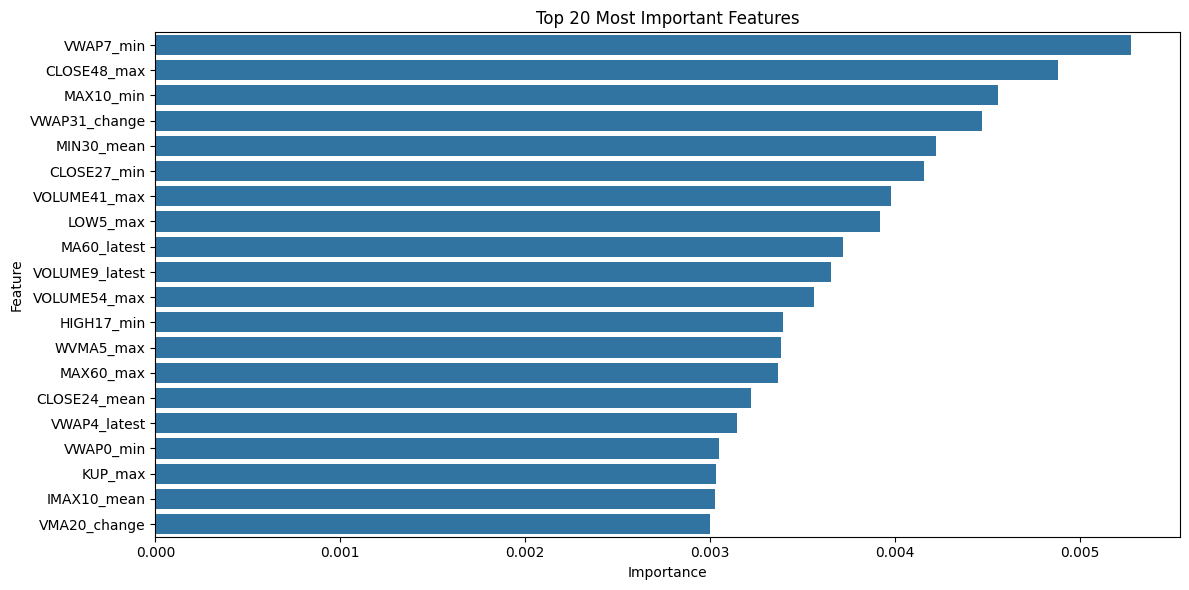


OOT预测结果示例:
        date predicted true_label  prob_BOTTOM  prob_ING  prob_TOP
0 2023-09-13       ING        ING     0.186119  0.771381  0.042500
1 2023-09-14       ING     BOTTOM     0.279795  0.681501  0.038703
2 2023-09-15       ING        ING     0.097356  0.855170  0.047474
3 2023-09-18       ING        ING     0.003375  0.973267  0.023358
4 2023-09-19       ING        ING     0.006747  0.969065  0.024188

OOT预测分布:
predicted
ING    31
Name: count, dtype: int64

预测概率示例:
        date predicted true_label  prob_BOTTOM  prob_ING  prob_TOP
0 2023-09-13       ING        ING     0.186119  0.771381  0.042500
1 2023-09-14       ING     BOTTOM     0.279795  0.681501  0.038703
2 2023-09-15       ING        ING     0.097356  0.855170  0.047474
3 2023-09-18       ING        ING     0.003375  0.973267  0.023358
4 2023-09-19       ING        ING     0.006747  0.969065  0.024188


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

class SlidingWindowModel:
    def __init__(self,
                 data: pd.DataFrame,
                 feature_columns: list,
                 label_column: str = 'label',
                 observation_window: int = 7,
                 performance_window: int = 2,
                 oot_samples: int = 30):
        """
        初始化滑动窗口模型
        """
        self.data = data.copy()
        self.feature_columns = feature_columns
        self.label_column = label_column
        self.observation_window = observation_window
        self.performance_window = performance_window
        self.oot_samples = oot_samples

        # 处理NaN值
        print("\n处理前的标签分布:")
        print(self.data[label_column].value_counts(dropna=False))

        # 移除标签为NaN的样本
        self.data = self.data.dropna(subset=[label_column])
        print("\n处理后的标签分布:")
        print(self.data[label_column].value_counts())

        # 将标签转换为数值
        self.le = LabelEncoder()
        self.data['label_encoded'] = self.le.fit_transform(self.data[label_column])

        # 保存类别标签
        self.classes_ = self.le.classes_

        # 初始化模型
        self.model = None

        # 打印初始化信息
        print(f"\n数据集大小: {len(self.data)}")
        print(f"特征数量: {len(self.feature_columns)}")
        print("\n标签编码映射:")
        for i, label in enumerate(self.le.classes_):
            print(f"{label}: {i}")

    def generate_single_sample(self, window_data: pd.DataFrame) -> np.ndarray:
        """
        从单个观察窗口生成特征
        """
        features = []
        for col in self.feature_columns:
            # 获取当前特征的最新值并处理可能的NaN值
            feature_series = window_data[col]
            feature_value = feature_series.iloc[-1]

            # 如果最新值是NaN，使用窗口内的最后一个非NaN值
            if pd.isna(feature_value):
                feature_value = feature_series.dropna().iloc[-1] if not feature_series.dropna().empty else 0

            features.append(feature_value)

            # 添加统计特征（处理NaN值）
            features.extend([
                feature_series.mean(),  # pandas的mean()会自动忽略NaN
                feature_series.std() if len(feature_series.dropna()) > 1 else 0,
                feature_series.max() if not feature_series.dropna().empty else 0,
                feature_series.min() if not feature_series.dropna().empty else 0,
                (feature_series.iloc[-1] - feature_series.iloc[0]) if not feature_series.isna().any() else 0
            ])

        return np.array(features)

    def generate_samples(self) -> tuple:
        """
        生成训练样本和OOT样本
        """
        if not isinstance(self.data.index, pd.DatetimeIndex):
            self.data.index = pd.to_datetime(self.data.index)

        total_samples_needed = self.observation_window + self.performance_window

        # 计算OOT数据的起始位置
        oot_start_idx = len(self.data) - self.oot_samples - total_samples_needed

        # 划分训练集和OOT集
        train_data = self.data.iloc[:oot_start_idx].copy()
        oot_data = self.data.iloc[oot_start_idx:].copy()

        print(f"\n训练数据起止日期: {train_data.index[0]} 到 {train_data.index[-1]}")
        print(f"OOT数据起止日期: {oot_data.index[0]} 到 {oot_data.index[-1]}")

        X_train_list, y_train_list, dates_train = [], [], []
        X_oot_list, y_oot_list, dates_oot = [], [], []

        # 生成训练样本
        for i in range(len(train_data) - total_samples_needed + 1):
            obs_start = i
            obs_end = i + self.observation_window
            perf_end = obs_end + self.performance_window

            # 确保性能窗口结束时有有效的标签
            if pd.isna(train_data.iloc[perf_end-1]['label_encoded']):
                continue

            window_data = train_data.iloc[obs_start:obs_end][self.feature_columns]
            features = self.generate_single_sample(window_data)
            label = train_data.iloc[perf_end-1]['label_encoded']

            X_train_list.append(features)
            y_train_list.append(label)
            dates_train.append(train_data.index[perf_end-1])

        # 生成OOT样本
        for i in range(len(oot_data) - total_samples_needed + 1):
            obs_start = i
            obs_end = i + self.observation_window
            perf_end = obs_end + self.performance_window

            # 确保性能窗口结束时有有效的标签
            if pd.isna(oot_data.iloc[perf_end-1]['label_encoded']):
                continue

            window_data = oot_data.iloc[obs_start:obs_end][self.feature_columns]
            features = self.generate_single_sample(window_data)
            label = oot_data.iloc[perf_end-1]['label_encoded']

            X_oot_list.append(features)
            y_oot_list.append(label)
            dates_oot.append(oot_data.index[perf_end-1])

        X_train = np.array(X_train_list)
        y_train = np.array(y_train_list)
        X_oot = np.array(X_oot_list)
        y_oot = np.array(y_oot_list)

        print(f"\n训练样本形状: X_train: {X_train.shape}, y_train: {y_train.shape}")
        print(f"OOT样本形状: X_oot: {X_oot.shape}, y_oot: {y_oot.shape}")

        print("\n训练集标签分布:")
        train_dist = pd.Series(self.le.inverse_transform(y_train)).value_counts()
        print(train_dist)
        print("\nOOT集标签分布:")
        oot_dist = pd.Series(self.le.inverse_transform(y_oot)).value_counts()
        print(oot_dist)

        return X_train, y_train, X_oot, y_oot, dates_train, dates_oot

    def plot_feature_importance(self, feature_importance: pd.DataFrame, top_n: int = 20):
        """
        绘制特征重要性图
        """
        plt.figure(figsize=(12, 6))
        sns.barplot(x='importance', y='feature',
                   data=feature_importance.head(top_n))
        plt.title(f'Top {top_n} Most Important Features')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()


    def evaluate_with_threshold(self, y_true, y_prob, thresholds=None):
        """
        使用不同阈值评估模型性能

        参数:
        y_true: 真实标签
        y_prob: 预测概率 (n_samples, n_classes)
        thresholds: 阈值字典，例如 {'TOP': 0.4, 'BOTTOM': 0.4}
        """
        if thresholds is None:
            thresholds = {'TOP': 0.4, 'BOTTOM': 0.4}

        # 获取每个类别的索引
        label_indices = {label: idx for idx, label in enumerate(self.classes_)}

        # 使用阈值进行预测
        predictions = []
        for probs in y_prob:
            top_prob = probs[label_indices['TOP']]
            bottom_prob = probs[label_indices['BOTTOM']]

            if top_prob >= thresholds['TOP']:
                pred = 'TOP'
            elif bottom_prob >= thresholds['BOTTOM']:
                pred = 'BOTTOM'
            else:
                pred = 'ING'
            predictions.append(pred)

        # 转换为数值标签
        y_pred = self.le.transform(predictions)

        # 计算评估指标
        report = classification_report(y_true, y_pred,
                                    labels=range(len(self.classes_)),
                                    target_names=self.classes_)
        conf_matrix = confusion_matrix(y_true, y_pred)

        return {
            'predictions': predictions,
            'probabilities': y_prob,
            'report': report,
            'confusion_matrix': conf_matrix
        }

    def train_model(self, model_type: str = 'xgb', thresholds=None):
        """
        训练模型并评估性能

        参数:
        model_type: 'rf' 或 'xgb'
        thresholds: 阈值字典，例如 {'TOP': 0.4, 'BOTTOM': 0.4}
        """
        X_train, y_train, X_oot, y_oot, dates_train, dates_oot = self.generate_samples()

        if len(X_train) == 0 or len(X_oot) == 0:
            raise ValueError("生成的样本为空，请检查窗口大小设置")

        # 计算类别权重
        classes = np.unique(y_train)
        class_weights = dict(zip(classes,
                              len(y_train) / (len(classes) * np.bincount(y_train))))

        if model_type == 'rf':
            self.model = RandomForestClassifier(
                n_estimators=100,
                max_depth=10,
                random_state=42,
                class_weight=class_weights,
                n_jobs=-1
            )
        elif model_type == 'xgb':
            self.model = xgb.XGBClassifier(
                n_estimators=100,
                max_depth=10,
                learning_rate=0.1,
                random_state=42,
                n_jobs=-1
            )

        # 训练模型
        self.model.fit(X_train, y_train)

        # 获取预测概率
        train_proba = self.model.predict_proba(X_train)
        oot_proba = self.model.predict_proba(X_oot)

        # 评估训练集性能
        print("\n训练集性能:")
        train_results = self.evaluate_with_threshold(y_train, train_proba, thresholds)
        print(train_results['report'])

        # 评估OOT样本性能
        print("\nOOT样本性能:")
        oot_results = self.evaluate_with_threshold(y_oot, oot_proba, thresholds)
        print(oot_results['report'])
        print("\nOOT样本混淆矩阵:")
        print(oot_results['confusion_matrix'])

        # 特征重要性分析
        if model_type == 'xgb':
            feature_names = []
            for f in self.feature_columns:
                feature_names.extend([
                    f"{f}_latest",
                    f"{f}_mean",
                    f"{f}_std",
                    f"{f}_max",
                    f"{f}_min",
                    f"{f}_change"
                ])

            importance = self.model.feature_importances_
            feature_importance = pd.DataFrame({
                'feature': feature_names[:len(importance)],
                'importance': importance
            })
            feature_importance = feature_importance.sort_values('importance', ascending=False)

            print("\n前20个最重要的特征:")
            print(feature_importance.head(20))

            # 绘制特征重要性图
            self.plot_feature_importance(feature_importance)

        # 创建包含概率的预测结果DataFrame
        train_predictions = pd.DataFrame({
            'date': dates_train,
            'predicted': train_results['predictions'],
            'true_label': self.le.inverse_transform(y_train)
        })

        for i, class_name in enumerate(self.classes_):
            train_predictions[f'prob_{class_name}'] = train_proba[:, i]

        oot_predictions = pd.DataFrame({
            'date': dates_oot,
            'predicted': oot_results['predictions'],
            'true_label': self.le.inverse_transform(y_oot)
        })

        for i, class_name in enumerate(self.classes_):
            oot_predictions[f'prob_{class_name}'] = oot_proba[:, i]

        return {
            'dates_train': dates_train,
            'dates_oot': dates_oot,
            'train_predictions': train_predictions,
            'oot_predictions': oot_predictions,
            'train_results': train_results,
            'oot_results': oot_results
        }

# 使用示例
if __name__ == "__main__":
    try:
        # 假设数据已经加载
        # data = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)

        # 创建模型实例
        model = SlidingWindowModel(
            data=data,
            feature_columns=feature_columns,
            observation_window=7,
            performance_window=2,
            oot_samples=30
        )

        # 设置阈值
        thresholds = {
            'TOP': 0.4,      # TOP类别的概率阈值
            'BOTTOM': 0.4    # BOTTOM类别的概率阈值
        }

        # 训练模型并获取结果
        results = model.train_model(model_type='xgb', thresholds=thresholds)

        # 查看OOT预测结果
        oot_pred = results['oot_predictions']
        print("\nOOT预测结果示例:")
        print(oot_pred.head())

        # 统计在不同阈值下的预测分布
        print("\nOOT预测分布:")
        print(oot_pred['predicted'].value_counts())

        # 查看具体样本的预测概率
        print("\n预测概率示例:")
        prob_cols = [col for col in oot_pred.columns if col.startswith('prob_')]
        print(oot_pred[['date', 'predicted', 'true_label'] + prob_cols].head())

    except Exception as e:
        print(f"错误: {str(e)}")
        import traceback
        traceback.print_exc()


处理前的标签分布:
label
ING       578
TOP       162
BOTTOM    161
Name: count, dtype: int64

处理后的标签分布:
label
ING       578
TOP       162
BOTTOM    161
Name: count, dtype: int64

数据集大小: 901
特征数量: 515

标签编码映射:
BOTTOM: 0
ING: 1
TOP: 2

训练数据起止日期: 2020-03-30 00:00:00 到 2023-08-30 00:00:00
OOT数据起止日期: 2023-08-31 00:00:00 到 2023-10-25 00:00:00

训练样本形状: X_train: (854, 3090), y_train: (854,)
OOT样本形状: X_oot: (31, 3090), y_oot: (31,)

训练集标签分布:
ING       546
TOP       154
BOTTOM    154
Name: count, dtype: int64

OOT集标签分布:
ING       21
BOTTOM     5
TOP        5
Name: count, dtype: int64

原始训练集类别分布:
ING       546
TOP       154
BOTTOM    154
Name: count, dtype: int64

SMOTE采样策略:
{np.int64(2): 382, np.int64(0): 382}

SMOTE重采样后的类别分布:
ING       546
TOP       382
BOTTOM    382
Name: count, dtype: int64

训练集性能:
              precision    recall  f1-score   support

      BOTTOM       1.00      1.00      1.00       382
         ING       1.00      1.00      1.00       546
         TOP       1.00      1.00      1.0

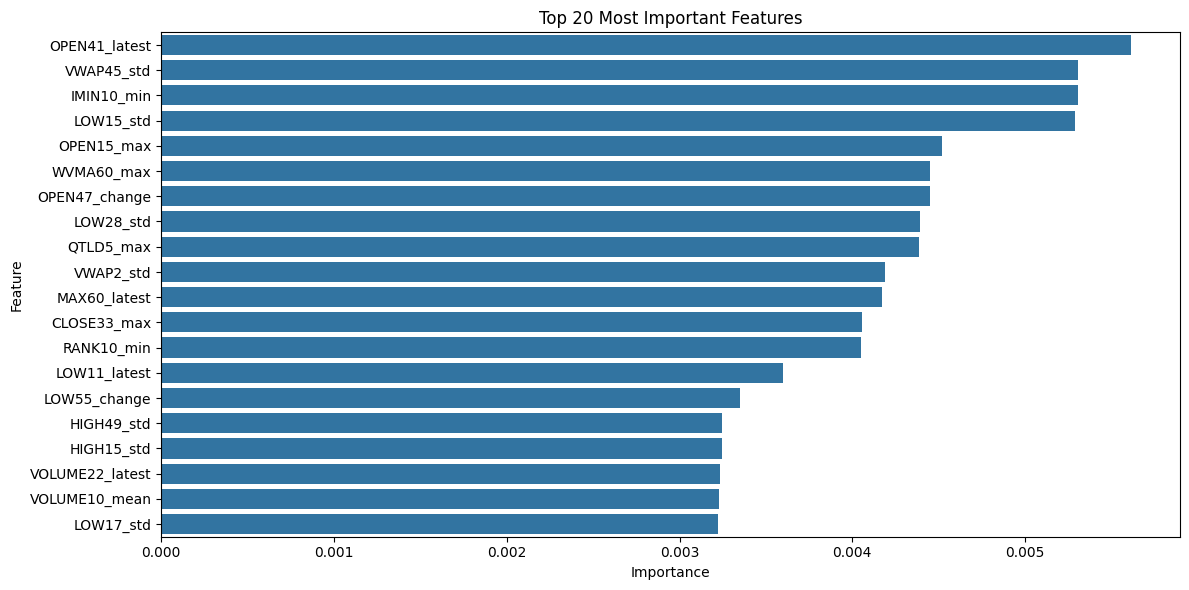


OOT预测结果示例:
        date predicted true_label  prob_BOTTOM  prob_ING  prob_TOP
0 2023-09-13    BOTTOM        ING     0.510098  0.125742  0.364160
1 2023-09-14    BOTTOM     BOTTOM     0.826234  0.148722  0.025044
2 2023-09-15    BOTTOM        ING     0.807013  0.135851  0.057136
3 2023-09-18       ING        ING     0.003160  0.976380  0.020460
4 2023-09-19       ING        ING     0.016576  0.942331  0.041092

OOT预测分布:
predicted
ING       22
BOTTOM     8
TOP        1
Name: count, dtype: int64

预测概率示例:
        date predicted true_label  prob_BOTTOM  prob_ING  prob_TOP
0 2023-09-13    BOTTOM        ING     0.510098  0.125742  0.364160
1 2023-09-14    BOTTOM     BOTTOM     0.826234  0.148722  0.025044
2 2023-09-15    BOTTOM        ING     0.807013  0.135851  0.057136
3 2023-09-18       ING        ING     0.003160  0.976380  0.020460
4 2023-09-19       ING        ING     0.016576  0.942331  0.041092


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

class SlidingWindowModel:
    def __init__(self,
                 data: pd.DataFrame,
                 feature_columns: list,
                 label_column: str = 'label',
                 observation_window: int = 7,
                 performance_window: int = 2,
                 oot_samples: int = 30):
        """
        初始化滑动窗口模型
        """
        self.data = data.copy()
        self.feature_columns = feature_columns
        self.label_column = label_column
        self.observation_window = observation_window
        self.performance_window = performance_window
        self.oot_samples = oot_samples

        # 处理NaN值
        print("\n处理前的标签分布:")
        print(self.data[label_column].value_counts(dropna=False))

        # 移除标签为NaN的样本
        self.data = self.data.dropna(subset=[label_column])
        print("\n处理后的标签分布:")
        print(self.data[label_column].value_counts())

        # 将标签转换为数值
        self.le = LabelEncoder()
        self.data['label_encoded'] = self.le.fit_transform(self.data[label_column])

        # 保存类别标签
        self.classes_ = self.le.classes_

        # 初始化模型
        self.model = None

        # 打印初始化信息
        print(f"\n数据集大小: {len(self.data)}")
        print(f"特征数量: {len(self.feature_columns)}")
        print("\n标签编码映射:")
        for i, label in enumerate(self.le.classes_):
            print(f"{label}: {i}")

    def generate_single_sample(self, window_data: pd.DataFrame) -> np.ndarray:
        """
        从单个观察窗口生成特征
        """
        features = []
        for col in self.feature_columns:
            # 获取当前特征的最新值并处理可能的NaN值
            feature_series = window_data[col]
            feature_value = feature_series.iloc[-1]

            # 如果最新值是NaN，使用窗口内的最后一个非NaN值
            if pd.isna(feature_value):
                feature_value = feature_series.dropna().iloc[-1] if not feature_series.dropna().empty else 0

            features.append(feature_value)

            # 添加统计特征（处理NaN值）
            features.extend([
                feature_series.mean(),  # pandas的mean()会自动忽略NaN
                feature_series.std() if len(feature_series.dropna()) > 1 else 0,
                feature_series.max() if not feature_series.dropna().empty else 0,
                feature_series.min() if not feature_series.dropna().empty else 0,
                (feature_series.iloc[-1] - feature_series.iloc[0]) if not feature_series.isna().any() else 0
            ])

        return np.array(features)

    def generate_samples(self) -> tuple:
        """
        生成训练样本和OOT样本
        """
        if not isinstance(self.data.index, pd.DatetimeIndex):
            self.data.index = pd.to_datetime(self.data.index)

        total_samples_needed = self.observation_window + self.performance_window

        # 计算OOT数据的起始位置
        oot_start_idx = len(self.data) - self.oot_samples - total_samples_needed

        # 划分训练集和OOT集
        train_data = self.data.iloc[:oot_start_idx].copy()
        oot_data = self.data.iloc[oot_start_idx:].copy()

        print(f"\n训练数据起止日期: {train_data.index[0]} 到 {train_data.index[-1]}")
        print(f"OOT数据起止日期: {oot_data.index[0]} 到 {oot_data.index[-1]}")

        X_train_list, y_train_list, dates_train = [], [], []
        X_oot_list, y_oot_list, dates_oot = [], [], []

        # 生成训练样本
        for i in range(len(train_data) - total_samples_needed + 1):
            obs_start = i
            obs_end = i + self.observation_window
            perf_end = obs_end + self.performance_window

            # 确保性能窗口结束时有有效的标签
            if pd.isna(train_data.iloc[perf_end-1]['label_encoded']):
                continue

            window_data = train_data.iloc[obs_start:obs_end][self.feature_columns]
            features = self.generate_single_sample(window_data)
            label = train_data.iloc[perf_end-1]['label_encoded']

            X_train_list.append(features)
            y_train_list.append(label)
            dates_train.append(train_data.index[perf_end-1])

        # 生成OOT样本
        for i in range(len(oot_data) - total_samples_needed + 1):
            obs_start = i
            obs_end = i + self.observation_window
            perf_end = obs_end + self.performance_window

            # 确保性能窗口结束时有有效的标签
            if pd.isna(oot_data.iloc[perf_end-1]['label_encoded']):
                continue

            window_data = oot_data.iloc[obs_start:obs_end][self.feature_columns]
            features = self.generate_single_sample(window_data)
            label = oot_data.iloc[perf_end-1]['label_encoded']

            X_oot_list.append(features)
            y_oot_list.append(label)
            dates_oot.append(oot_data.index[perf_end-1])

        X_train = np.array(X_train_list)
        y_train = np.array(y_train_list)
        X_oot = np.array(X_oot_list)
        y_oot = np.array(y_oot_list)

        print(f"\n训练样本形状: X_train: {X_train.shape}, y_train: {y_train.shape}")
        print(f"OOT样本形状: X_oot: {X_oot.shape}, y_oot: {y_oot.shape}")

        print("\n训练集标签分布:")
        train_dist = pd.Series(self.le.inverse_transform(y_train)).value_counts()
        print(train_dist)
        print("\nOOT集标签分布:")
        oot_dist = pd.Series(self.le.inverse_transform(y_oot)).value_counts()
        print(oot_dist)

        return X_train, y_train, X_oot, y_oot, dates_train, dates_oot

    def plot_feature_importance(self, feature_importance: pd.DataFrame, top_n: int = 20):
        """
        绘制特征重要性图
        """
        plt.figure(figsize=(12, 6))
        sns.barplot(x='importance', y='feature',
                   data=feature_importance.head(top_n))
        plt.title(f'Top {top_n} Most Important Features')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()


    def evaluate_with_threshold(self, y_true, y_prob, thresholds=None):
        """
        使用不同阈值评估模型性能

        参数:
        y_true: 真实标签
        y_prob: 预测概率 (n_samples, n_classes)
        thresholds: 阈值字典，例如 {'TOP': 0.4, 'BOTTOM': 0.4}
        """
        if thresholds is None:
            thresholds = {'TOP': 0.4, 'BOTTOM': 0.4}

        # 获取每个类别的索引
        label_indices = {label: idx for idx, label in enumerate(self.classes_)}

        # 使用阈值进行预测
        predictions = []
        for probs in y_prob:
            top_prob = probs[label_indices['TOP']]
            bottom_prob = probs[label_indices['BOTTOM']]

            if top_prob >= thresholds['TOP']:
                pred = 'TOP'
            elif bottom_prob >= thresholds['BOTTOM']:
                pred = 'BOTTOM'
            else:
                pred = 'ING'
            predictions.append(pred)

        # 转换为数值标签
        y_pred = self.le.transform(predictions)

        # 计算评估指标
        report = classification_report(y_true, y_pred,
                                    labels=range(len(self.classes_)),
                                    target_names=self.classes_)
        conf_matrix = confusion_matrix(y_true, y_pred)

        return {
            'predictions': predictions,
            'probabilities': y_prob,
            'report': report,
            'confusion_matrix': conf_matrix
        }

    def train_model(self, model_type: str = 'xgb', thresholds=None, sampling_method='weight', smote_target_ratios=None):
        """
        训练模型并评估性能
        """
        X_train, y_train, X_oot, y_oot, dates_train, dates_oot = self.generate_samples()

        if len(X_train) == 0 or len(X_oot) == 0:
            raise ValueError("生成的样本为空，请检查窗口大小设置")

        # 保存原始训练数据的索引
        original_train_indices = np.arange(len(X_train))

        # 打印原始类别分布
        print("\n原始训练集类别分布:")
        original_dist = pd.Series(self.le.inverse_transform(y_train)).value_counts()
        print(original_dist)

        # 根据选择的方法处理类别不平衡
        if sampling_method == 'smote':
            if smote_target_ratios is None:
                # 默认设置：将少数类的样本量增加到多数类的70%
                majority_class_count = original_dist.max()
                smote_target_ratios = {}
                for label in original_dist.index:
                    if label != original_dist.index[0]:  # 假设第一个是多数类
                        smote_target_ratios[label] = 0.7

            # 构建SMOTE的采样策略字典
            sampling_strategy = {}
            for label, ratio in smote_target_ratios.items():
                target_count = int(original_dist.max() * ratio)
                current_count = original_dist[label]
                if target_count > current_count:  # 只有需要增加样本时才设置
                    sampling_strategy[self.le.transform([label])[0]] = target_count

            print("\nSMOTE采样策略:")
            print(sampling_strategy)

            # 使用SMOTE进行重采样
            smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy)
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

            # 创建重采样后的日期数组
            # 对于原始样本，保持原始日期
            # 对于合成样本，使用最近的原始样本的日期
            n_synthetic = len(X_train_resampled) - len(X_train)
            dates_train_resampled = np.empty(len(X_train_resampled), dtype=object)

            # 复制原始日期
            dates_train_resampled[:len(dates_train)] = dates_train

            # 为合成样本分配日期（使用最近的原始样本的日期）
            for i in range(len(dates_train), len(dates_train_resampled)):
                # 找到最近的原始样本
                distances = np.linalg.norm(X_train_resampled[i] - X_train, axis=1)
                nearest_idx = np.argmin(distances)
                dates_train_resampled[i] = dates_train[nearest_idx]

            # 更新训练数据
            X_train = X_train_resampled
            y_train = y_train_resampled
            dates_train = dates_train_resampled

            # 打印重采样后的类别分布
            print("\nSMOTE重采样后的类别分布:")
            print(pd.Series(self.le.inverse_transform(y_train)).value_counts())

            # SMOTE后使用平衡的类别权重
            class_weights = 'balanced'

        else:  # sampling_method == 'weight'
            # 计算类别权重，给予少数类更高的权重
            class_weights = compute_class_weight(
                class_weight='balanced',
                classes=np.unique(y_train),
                y=y_train
            )
            class_weights = dict(zip(np.unique(y_train), class_weights))

            # 进一步调整权重，可以根据需要修改这些系数
            weight_multipliers = {
                self.le.transform(['TOP'])[0]: 2.0,    # 进一步增加TOP类的权重
                self.le.transform(['BOTTOM'])[0]: 2.0  # 进一步增加BOTTOM类的权重
            }

            for k, v in weight_multipliers.items():
                if k in class_weights:
                    class_weights[k] *= v

            print("\n使用的类别权重:")
            for k, v in class_weights.items():
                print(f"{self.le.inverse_transform([k])[0]}: {v:.2f}")

        # 创建和训练模型
        if model_type == 'rf':
            self.model = RandomForestClassifier(
                n_estimators=100,
                max_depth=10,
                random_state=42,
                class_weight=class_weights if sampling_method == 'weight' else None,
                n_jobs=-1
            )
        elif model_type == 'xgb':
            if sampling_method == 'weight':
                sample_weights = np.ones(len(y_train))
                for k, v in class_weights.items():
                    sample_weights[y_train == k] = v

                self.model = xgb.XGBClassifier(
                    n_estimators=100,
                    max_depth=10,
                    learning_rate=0.1,
                    random_state=42,
                    n_jobs=-1
                )
            else:
                self.model = xgb.XGBClassifier(
                    n_estimators=100,
                    max_depth=10,
                    learning_rate=0.1,
                    random_state=42,
                    n_jobs=-1
                )

        # 训练模型
        if model_type == 'xgb' and sampling_method == 'weight':
            self.model.fit(X_train, y_train, sample_weight=sample_weights)
        else:
            self.model.fit(X_train, y_train)

        # 获取预测概率
        train_proba = self.model.predict_proba(X_train)
        oot_proba = self.model.predict_proba(X_oot)

        # 评估训练集性能
        print("\n训练集性能:")
        train_results = self.evaluate_with_threshold(y_train, train_proba, thresholds)
        print(train_results['report'])

        # 评估OOT样本性能
        print("\nOOT样本性能:")
        oot_results = self.evaluate_with_threshold(y_oot, oot_proba, thresholds)
        print(oot_results['report'])
        print("\nOOT样本混淆矩阵:")
        print(oot_results['confusion_matrix'])

        # 特征重要性分析
        if model_type == 'xgb':
            feature_names = []
            for f in self.feature_columns:
                feature_names.extend([
                    f"{f}_latest",
                    f"{f}_mean",
                    f"{f}_std",
                    f"{f}_max",
                    f"{f}_min",
                    f"{f}_change"
                ])

            importance = self.model.feature_importances_
            feature_importance = pd.DataFrame({
                'feature': feature_names[:len(importance)],
                'importance': importance
            })
            feature_importance = feature_importance.sort_values('importance', ascending=False)

            print("\n前20个最重要的特征:")
            print(feature_importance.head(20))

            # 绘制特征重要性图
            self.plot_feature_importance(feature_importance)


        # 创建包含概率的预测结果DataFrame
        train_predictions = pd.DataFrame({
            'date': dates_train,
            'predicted': train_results['predictions'],
            'true_label': self.le.inverse_transform(y_train)
        })

        for i, class_name in enumerate(self.classes_):
            train_predictions[f'prob_{class_name}'] = train_proba[:, i]

        oot_predictions = pd.DataFrame({
            'date': dates_oot,
            'predicted': oot_results['predictions'],
            'true_label': self.le.inverse_transform(y_oot)
        })

        for i, class_name in enumerate(self.classes_):
            oot_predictions[f'prob_{class_name}'] = oot_proba[:, i]

        return {
            'dates_train': dates_train,
            'dates_oot': dates_oot,
            'train_predictions': train_predictions,
            'oot_predictions': oot_predictions,
            'train_results': train_results,
            'oot_results': oot_results
        }

# 使用示例
if __name__ == "__main__":
    try:
        # 假设数据已经加载
        # data = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)

        # 创建模型实例
        model = SlidingWindowModel(
            data=data,
            feature_columns=feature_columns,
            observation_window=7,
            performance_window=2,
            oot_samples=30
        )

        # 设置阈值
        thresholds = {
            'TOP': 0.4,      # TOP类别的概率阈值
            'BOTTOM': 0.4    # BOTTOM类别的概率阈值
        }

        ## 方案：使用权重调整
        #results_weight = model.train_model(
        #    model_type='xgb',
        #    thresholds=thresholds,
        #    sampling_method='weight'
        #)

        # 方案：使用SMOTE重采样
        smote_target_ratios = {
            'TOP': 0.7,     # TOP类样本量将达到多数类的70%
            'BOTTOM': 0.7   # BOTTOM类样本量将达到多数类的70%
        }

        results_smote = model.train_model(
            model_type='xgb',
            thresholds=thresholds,
            sampling_method='smote',
            smote_target_ratios=smote_target_ratios
        )

        ## 训练模型并获取结果
        #results = results_weight

        ## 查看OOT预测结果
        #oot_pred = results['oot_predictions']
        #print("\nOOT预测结果示例:")
        #print(oot_pred.head())

        ## 统计在不同阈值下的预测分布
        #print("\nOOT预测分布:")
        #print(oot_pred['predicted'].value_counts())

        ## 查看具体样本的预测概率
        #print("\n预测概率示例:")
        #prob_cols = [col for col in oot_pred.columns if col.startswith('prob_')]
        #print(oot_pred[['date', 'predicted', 'true_label'] + prob_cols].head())


        # 训练模型并获取结果
        results = results_smote

        # 查看OOT预测结果
        oot_pred = results['oot_predictions']
        print("\nOOT预测结果示例:")
        print(oot_pred.head())

        # 统计在不同阈值下的预测分布
        print("\nOOT预测分布:")
        print(oot_pred['predicted'].value_counts())

        # 查看具体样本的预测概率
        print("\n预测概率示例:")
        prob_cols = [col for col in oot_pred.columns if col.startswith('prob_')]
        print(oot_pred[['date', 'predicted', 'true_label'] + prob_cols].head())

    except Exception as e:
        print(f"错误: {str(e)}")
        import traceback
        traceback.print_exc()